# Importing Libraries

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Changing default matplotlib graph setting to custom
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

# Loading Data

In [36]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [37]:
df.shape

(918, 12)

# Analysis & Preparation

In [38]:
# Creating a copy of data
data = df.copy()

# Checking data type and other info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [39]:
# Checking statistical properties of data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918,NaN,NaN,NaN,53.5109,9.43262,28,47,54,60,77
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918,NaN,NaN,NaN,132.397,18.5142,0,120,130,140,200
Cholesterol,918,NaN,NaN,NaN,198.8,109.384,0,173.25,223,267,603
FastingBS,918,NaN,NaN,NaN,0.233115,0.423046,0,0,0,0,1
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918,NaN,NaN,NaN,136.809,25.4603,60,120,138,156,202
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918,NaN,NaN,NaN,0.887364,1.06657,-2.6,0,0.6,1.5,6.2


In [40]:
# Calculating variance of numerical features
df.var(skipna=True)

Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

In [41]:
# Checking skewness
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [42]:
# Ratio of being heart failure patient
df.HeartDisease.value_counts()[1]/df.shape[0]

0.5533769063180828

In [43]:
def make_distplot(x):
    if df[x].dtype != "object":
        tem = df[df[x] > df[x].mean()].HeartDisease
        ratio = tem.value_counts()[1]/tem.shape[0]
        print(f"Heart Failure Ratio in people having {x} more than average value is {ratio}")
        
        plt.figure(figsize=(16, 4))
        plt.subplot(131)
        sns.kdeplot(df[x])
        plt.title("Distribution using KDE")

        plt.subplot(132)
        sns.violinplot(df[x])
        plt.title("Distribution using Violin Plot")

        plt.subplot(133)
        sns.scatterplot(df[x], df.RestingBP, hue=df.HeartDisease)
        plt.title("Distribution using Scatter Plot")
        plt.show()
    else:
        data = {}
        for i in df[x].unique():
            temp = df[df[x] == i]
            ratio = temp.HeartDisease.value_counts()[1]/temp.shape[0]
            data[i] = ratio

        for i, j in data.items():
            print(f"Heart Failure Ratio in {x} {str(i).upper()} is {j}")
        
        plt.figure(figsize=(16, 4))
        plt.subplot(121)
        sns.countplot(df[x])
        plt.title("Frequency Distribution")

        ax = plt.subplot(122)
        pd.crosstab(df[x], df.HeartDisease).plot(kind="bar", ax=ax, stacked=True)
#         sns.histplot(x=df[x], hue=df.HeartDisease)
        plt.title("Distribution with Target")
        plt.show()

Distribution of AGE
Heart Failure Ratio in people having Age more than average value is 0.6706827309236948


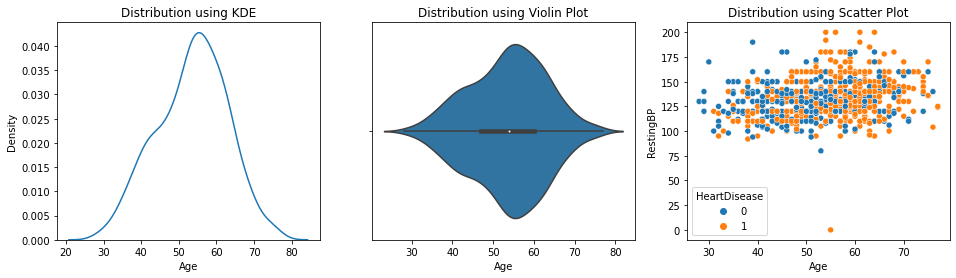

Distribution of SEX
Heart Failure Ratio in Sex M is 0.6317241379310344
Heart Failure Ratio in Sex F is 0.25906735751295334


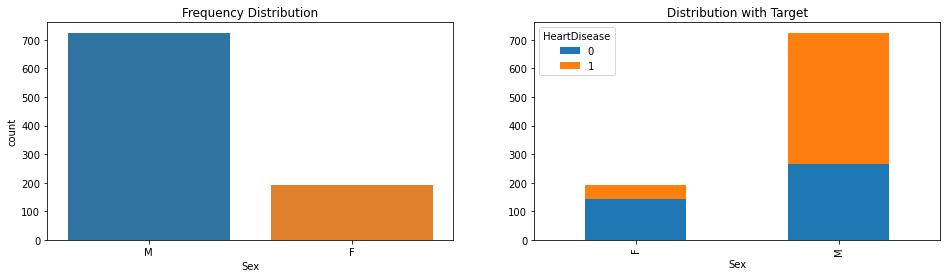

Distribution of CHESTPAINTYPE
Heart Failure Ratio in ChestPainType ATA is 0.13872832369942195
Heart Failure Ratio in ChestPainType NAP is 0.35467980295566504
Heart Failure Ratio in ChestPainType ASY is 0.7903225806451613
Heart Failure Ratio in ChestPainType TA is 0.43478260869565216


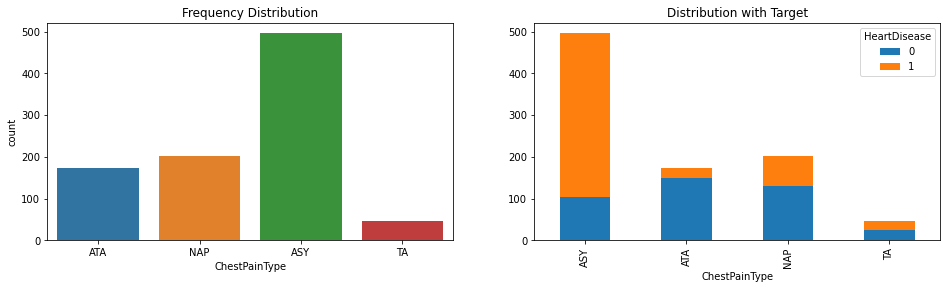

Distribution of RESTINGBP
Heart Failure Ratio in people having RestingBP more than average value is 0.6237623762376238


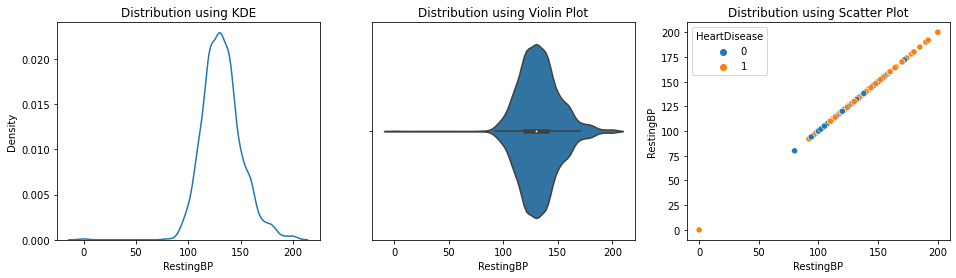

Distribution of CHOLESTEROL
Heart Failure Ratio in people having Cholesterol more than average value is 0.49585406301824214


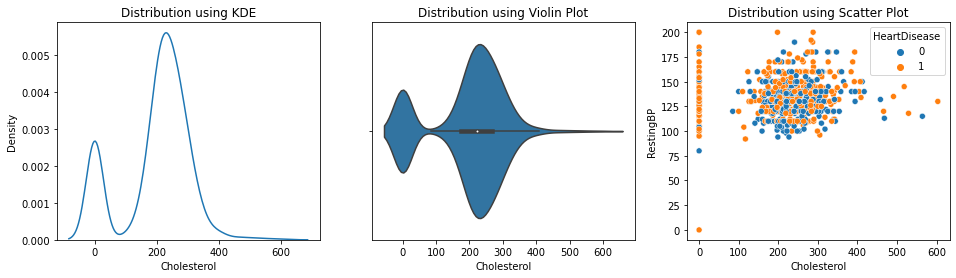

Distribution of FASTINGBS
Heart Failure Ratio in people having FastingBS more than average value is 0.794392523364486


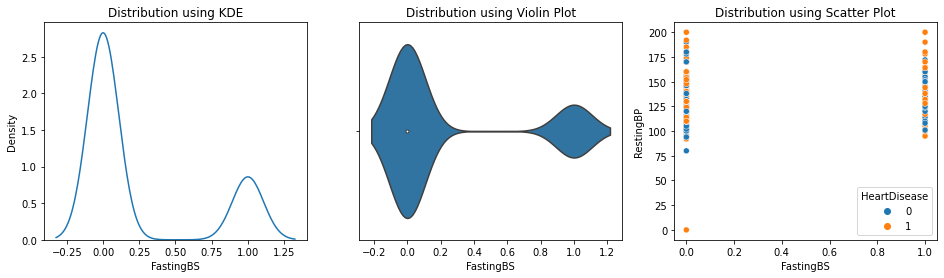

Distribution of RESTINGECG
Heart Failure Ratio in RestingECG NORMAL is 0.5163043478260869
Heart Failure Ratio in RestingECG ST is 0.6573033707865169
Heart Failure Ratio in RestingECG LVH is 0.5638297872340425


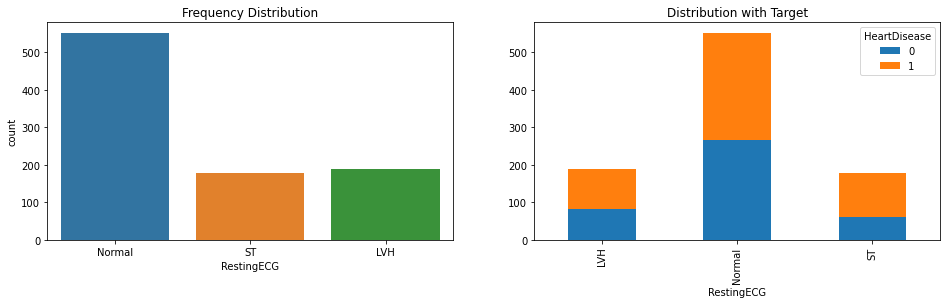

Distribution of MAXHR
Heart Failure Ratio in people having MaxHR more than average value is 0.37763713080168776


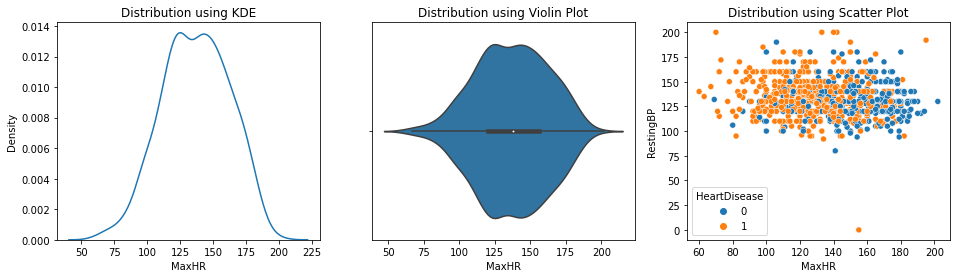

Distribution of EXERCISEANGINA
Heart Failure Ratio in ExerciseAngina N is 0.3510054844606947
Heart Failure Ratio in ExerciseAngina Y is 0.8517520215633423


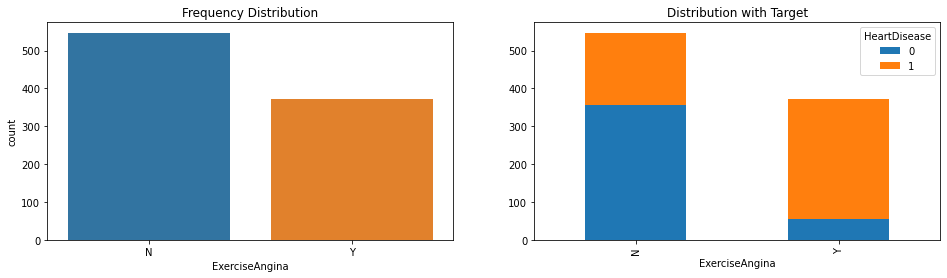

Distribution of OLDPEAK
Heart Failure Ratio in people having Oldpeak more than average value is 0.7848699763593381


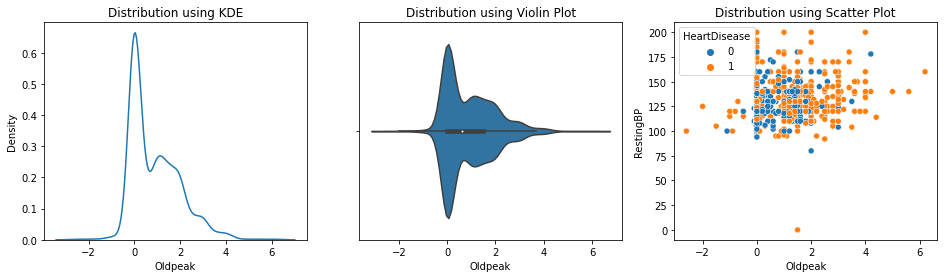

Distribution of ST_SLOPE
Heart Failure Ratio in ST_Slope UP is 0.19746835443037974
Heart Failure Ratio in ST_Slope FLAT is 0.8282608695652174
Heart Failure Ratio in ST_Slope DOWN is 0.7777777777777778


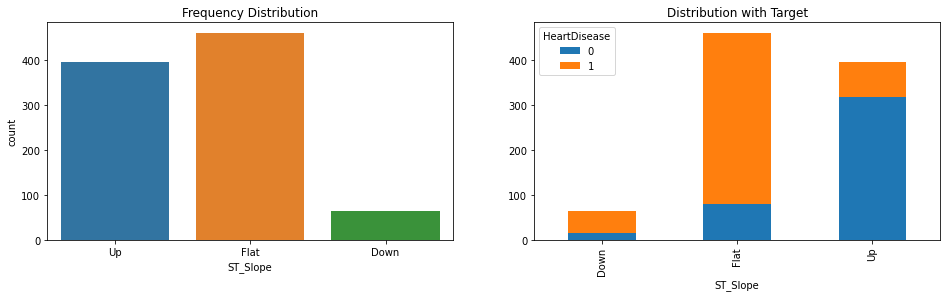

Distribution of HEARTDISEASE
Heart Failure Ratio in people having HeartDisease more than average value is 1.0


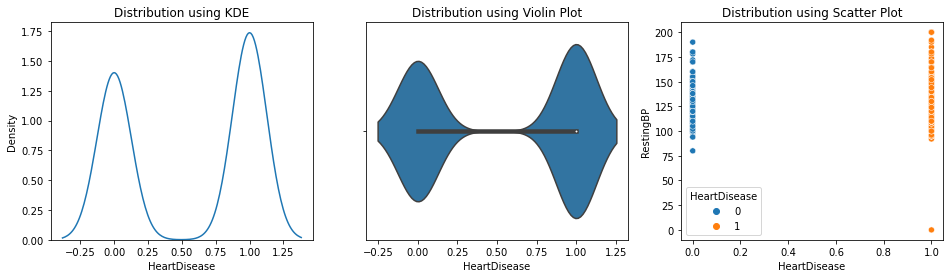

In [44]:
for i in df.columns:
    print(f"Distribution of {str(i).upper()}")
    make_distplot(i)
    print("="*50)

In [11]:
def encode_feeatures(cols, df=df):
    # Encoding categorical features
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()

    for i in cols:
        df[i] = encoder.fit_transform(df[i])
    return df

In [12]:
# Categorical features
cols = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

df = encode_feeatures(cols)

In [13]:
df.corr().style.background_gradient(cmap='Oranges')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


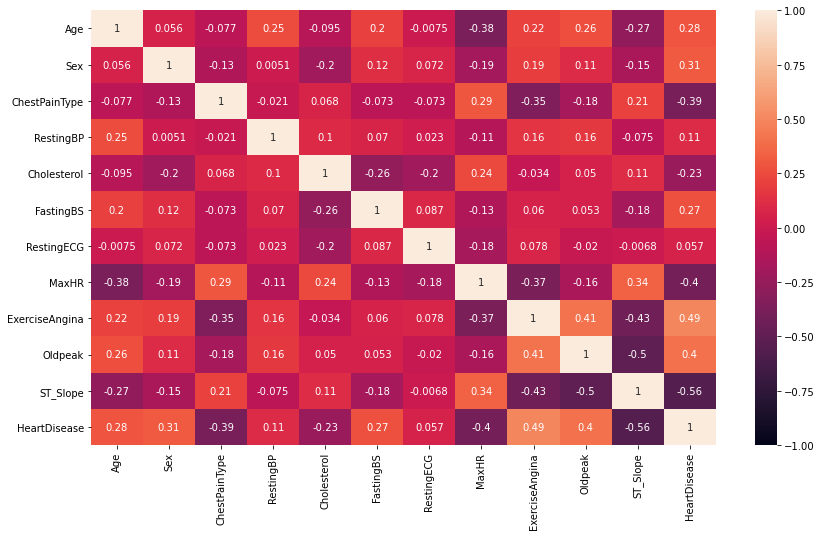

In [14]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

# Data Preparation

In [15]:
df = data.copy()

In [16]:
df[df.columns[:-1]] = df[df.columns[:-1]].replace(0, np.nan)

In [17]:
# lets try to check the percentage of missing values,unique values,percentage of one catagory values and type against each column.
def statistics(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum(), df[col].isnull().sum() * 100 / df.shape[0], df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Missing values', 'Percentage of Missing Values', 'Data Type'])
    stats_df.set_index('Feature', drop=True, inplace=True)
    stats_df.drop(stats_df[stats_df['Missing values'] == 0].index, axis=0, inplace=True)
    stats_df.sort_values('Percentage of Missing Values', ascending=False, inplace=True)
    return stats_df

statistics(df)

,Unique_values,Missing values,Percentage of Missing Values,Data Type
Feature,,,,
FastingBS,1,704,76.688453,float64
Oldpeak,52,368,40.087146,float64
Cholesterol,221,172,18.736383,float64
RestingBP,66,1,0.108932,float64


In [18]:
import missingno as msno

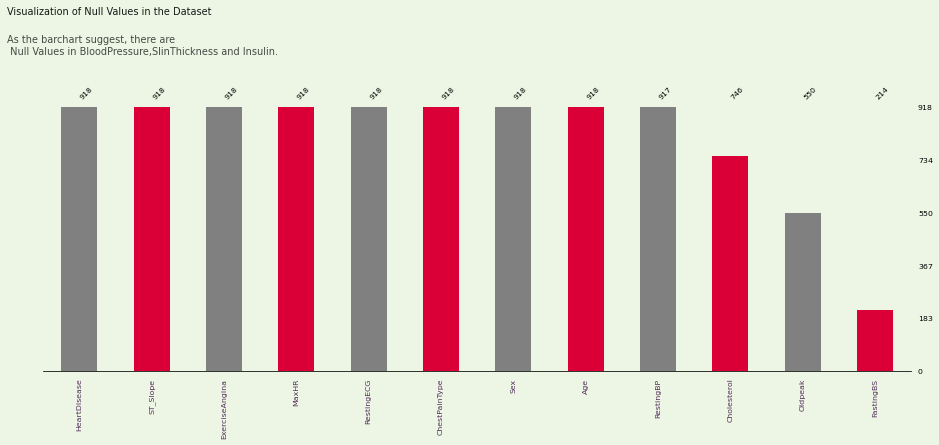

In [19]:
def visualize_null(df):
    color = ['grey','#DA0037']*4
    fig, ax = plt.subplots(figsize = (16,5), dpi = 70)
    fig.patch.set_facecolor('#EDF6E5')
    ax.set_facecolor('#EDF6E5')


    msno.bar(df, sort = 'descending', 
             color = color, 
             ax = ax, fontsize =8,
             labels = 'off',filter = 'top')

    ax.text(-1,1.35,'Visualization of Null Values in the Dataset',{'color':'black'},alpha = 0.9)
    ax.text(-1,1.2,'As the barchart suggest, there are \n Null Values in BloodPressure,SlinThickness and Insulin.',{'color':'black'}, alpha = 0.7)

    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                       ha = 'center', **{'weight':'normal','color':'#512b58'}, alpha = 1)
    ax.set_yticklabels('')
    ax.spines['bottom'].set_visible(True)

    fig.show()
    
visualize_null(df)

In [20]:
df[statistics(df).index]

,FastingBS,Oldpeak,Cholesterol,RestingBP
0,NaN,NaN,289.0,140.0
1,NaN,1.0,180.0,160.0
2,NaN,NaN,283.0,130.0
3,NaN,1.5,214.0,138.0
4,NaN,NaN,195.0,150.0
...,...,...,...,...
913,NaN,1.2,264.0,110.0
914,1.0,3.4,193.0,144.0
915,NaN,1.2,131.0,130.0
916,NaN,NaN,236.0,130.0


We can't generate 70 percent data from only 30 percent that's why we will drop FastingBS.

In [21]:
# Dropping empty feature
df.drop("FastingBS", axis=1, inplace=True)

# Filling NAN
for i in statistics(df).index:
    df[i].fillna(df[i].mean(), inplace=True)

In [22]:
# Encoding categorical features
df = encode_feeatures(df.select_dtypes("O").columns, df)

In [23]:
X = df.drop("HeartDisease", axis=1)
y = df.HeartDisease

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building Models

In [26]:
# Importing Model
from sklearn.ensemble import RandomForestClassifier

# Importing Evaluation matrces
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_roc_curve, plot_confusion_matrix


In [27]:
# Fitting model to the Training set
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# predict values
y_pred = clf.predict(X_test)

In [28]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision
precision = precision_score(y_test, y_pred, average=None)
# Recall
recall = recall_score(y_test, y_pred, average=None)
# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)
# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
# Report
report = classification_report(y_test, y_pred)

+ ==================================================================================================== +
			RestingBP-For RandomForestClassifier() The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.8695652173913043
--------------------------------------------------
F1 :  [0.85       0.88461538]
--------------------------------------------------
Reacll :  [0.85714286 0.87898089]
--------------------------------------------------
Precision :  [0.84297521 0.89032258]
--------------------------------------------------
Confusion Matrix....
 [[102  17]
 [ 19 138]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       119
           1       0.89      0.88      0.88       157

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87

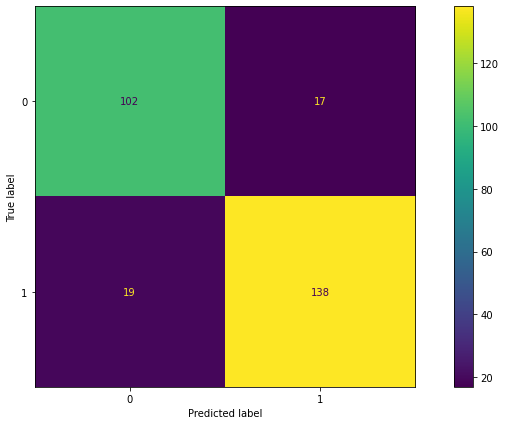

In [29]:
print("+","="*100,"+")
print('\033[1m' + f"\t\t\t{i}-For {str(clf)} The Performance result is: " + '\033[0m')
print("+","="*100,"+")
print('Accuracy : ', accuracy)   
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

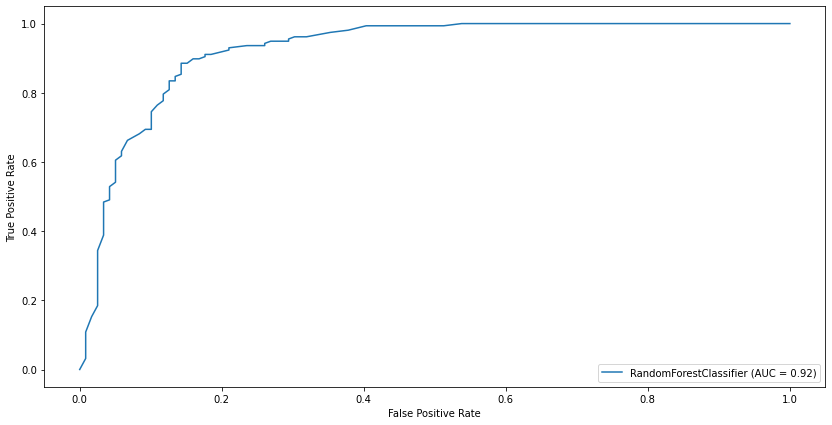

In [30]:
plot_roc_curve(clf, X_test, y_test)
plt.show()